In [1]:
ls

1003-HW2-WenxinZhang.ipynb           mnist_classification_source_code.py
hw2.pdf                              ridge_regression_dataset.csv
hw2.tex                              skeleton_code.py
math_commands.tex


# Import 

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data 

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('ridge_regression_dataset.csv')
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x39,x40,x41,x42,x43,x44,x45,x46,x47,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.951051,-0.951051,-4.755257,-0.866019,-0.866019,-4.330093,-0.781824,-0.781824,-3.909121,-1.376575
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948871,-0.948871,-4.744353,-0.863095,-0.863095,-4.315474,-0.778705,-0.778705,-3.893525,0.878782
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.948056,-0.948056,-4.740279,-0.862011,-0.862011,-4.310053,-0.777551,-0.777551,-3.887757,1.108701
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.941999,-0.941999,-4.709996,-0.854081,-0.854081,-4.270406,-0.769161,-0.769161,-3.845805,0.519229
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.939440,-0.939440,-4.697202,-0.850794,-0.850794,-4.253972,-0.765706,-0.765706,-3.828531,0.772872


# Functions

In [5]:
def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    
    return X_train, y_train, X_test, y_test

### Answer to Question_1

In [6]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    # TODO
    
    # discard the features with constant values
    # since they cannot be normalized 
    train = train[:, train.std(axis=0) != 0] 
    
    # feature normalization; [0, 1] 
    # shift and rescale
    min_val, max_val = train.min(axis=0), train.max(axis=0)
    
    train_normalized = (train - min_val)/(max_val - min_val)
    test_normalized = (test - min_val)/(max_val - min_val)
    
    return train_normalized, test_normalized

In [7]:
train_X, train_y, test_X, test_y = load_data()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


### Answer to Question_2

$$
J(\theta)=\frac{1}{m}(X\theta-y)^T(X\theta-y)
$$

### Answer to Question_3

$$
\nabla J(\theta)
=\nabla J(\frac{1}{m}(\theta^TX^TX\theta-\theta^TX^Ty-y^TX\theta+X^Ty))
=\frac{2}{m}(X^TX\theta-X^Ty)
$$ 

### Answer to Question_4

$$
\theta^{new}=\theta-\eta \bigtriangledown J(\theta)
=\theta-\frac{2\eta}{m}(X^TX\theta-X^Ty)
$$

### Answer to Question_5

In [8]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    #TODO
    
    m = X.shape[0]
    loss = 1/m * np.linalg.norm (X @ theta - y) ** 2
    
    return loss

In [54]:
from sklearn.metrics import mean_squared_error as mse
X = train_X
y = train_y
theta = [1]*train_X.shape[1]
compute_square_loss(X,y,theta) # 882.8685220487787
mse(y, X@theta) # 882.8685220487786

882.8685220487787

### Answer to Question_6

In [10]:
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    m = X.shape[0]
    grad = 2/m * (X.T @ X @ theta - X.T @ y)
    
    return grad

In [11]:
# To very this answer:
# X = np.array([[1,2,3],[1,2,3]])
# y = np.array([5,5])
# theta = np.array([1,1,1])
compute_square_loss_gradient(X,y,theta) 

# Computed by hand, the grad is the same as the return of the func
# Thus, it is verfied this func works well

array([2., 4., 6.])

### Answer to Question_7

In [12]:
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO

    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i] = 1
        approx_grad[i] = (compute_square_loss(X, y, theta + epsilon * e_i) - compute_square_loss(X, y, theta - epsilon * e_i)) / (2 * epsilon)

    euc_dist = np.linalg.norm(approx_grad - true_gradient)
    return euc_dist <= tolerance


In [13]:
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i] = 1
        approx_grad[i] = (objective_func(X, y, theta + epsilon * e_i) - objective_func(X, y, theta - epsilon * e_i)) / (2 * epsilon)

    euc_dist = np.linalg.norm(approx_grad - true_gradient)
    return euc_dist <= tolerance


In [14]:
#Test
theta = np.array([0]*train_X.shape[1])
grad_checker(train_X, train_y, theta, epsilon=0.01, tolerance=1e-4)

True

In [15]:
#Test
generic_gradient_checker(train_X, train_y, theta, compute_square_loss, compute_square_loss_gradient, epsilon=0.01, tolerance=1e-4)

True

### Answer to Question_8

In [16]:
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=True):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    #TODO
    
    # whether checking the gradient when updating
    for step in range(num_step+1):
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)
        if grad_check and not grad_checker(X, y, theta):
            break
        theta = theta - alpha * compute_square_loss_gradient(X, y, theta)
        
    return theta_hist, loss_hist

### Answer to Question_9

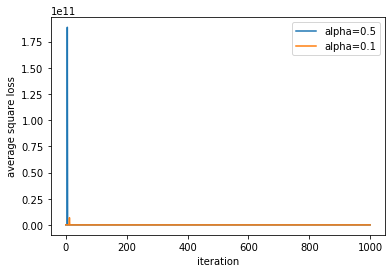

In [17]:
# If the step size is too large, gradient descent may not converge

for alpha in [0.5, 0.1]:
    theta_hist,loss_hist = batch_grad_descent(train_X, train_y, alpha=alpha, num_step=1000, grad_check=True)
    plt.plot(range(len(loss_hist)),loss_hist,label=f'alpha={alpha}')
plt.legend()
plt.xlabel("iteration")
plt.ylabel("average square loss")
plt.show()

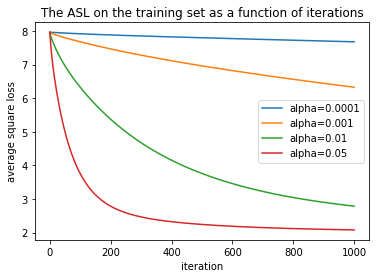

In [18]:
for alpha in [0.0001, 0.001, 0.01, 0.05]:
    theta_hist,loss_hist=batch_grad_descent(train_X, train_y, alpha=alpha, num_step=1000, grad_check=True)
    plt.plot(range(len(loss_hist)),loss_hist,label=f'alpha={alpha}')
plt.legend()
plt.title('The ASL on the training set as a function of iterations')
plt.xlabel("iteration")
plt.ylabel("average square loss")
plt.show()

Briefly summarize: 

- When the step size is too large, the gradient descent doesn't converge at all.
- When the step size is small, the average sqaure loss would decrease and converge. In the safe step-size range for convergency, the larger the step size is, the faster the average square loss converges. Consider this example, when alpha = 0.05, ASL tends to converge after nearly 400 iterations; in contrast, when alpha = 0.0001, ASL does not converge after 1000 iterations.

### Answer to Question_10

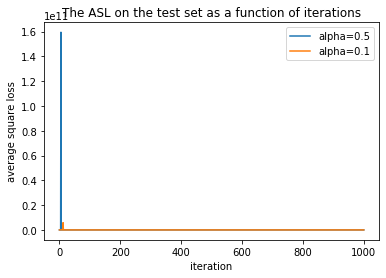

In [19]:
# iterations
for alpha in [0.5, 0.1]:
    theta_hist,loss_hist = batch_grad_descent(train_X, train_y, alpha=alpha, num_step=1000, grad_check=True)
    loss_hist = [compute_square_loss(test_X, test_y, theta) for theta in theta_hist]
    plt.plot(range(len(loss_hist)),loss_hist,label=f'alpha={alpha}');
plt.legend()
plt.title('The ASL on the test set as a function of iterations')
plt.xlabel("iteration")
plt.ylabel("average square loss")
plt.show()

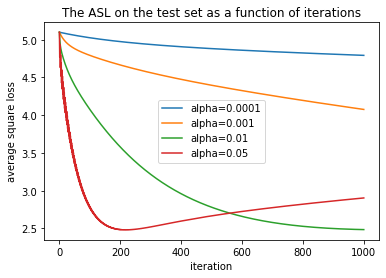

In [20]:
# iterations
for alpha in [0.0001, 0.001, 0.01, 0.05]:
    theta_hist,loss_hist = batch_grad_descent(train_X, train_y, alpha=alpha, num_step=1000, grad_check=True)
    loss_hist = [compute_square_loss(test_X, test_y, theta) for theta in theta_hist]
    plt.plot(range(len(loss_hist)),loss_hist,label=f'alpha={alpha}');
plt.legend()
plt.title('The ASL on the test set as a function of iterations')
plt.xlabel("iteration")
plt.ylabel("average square loss")
plt.show()

### Answer to Question_11

$$J_\lambda(\theta)=\frac1m(X\theta-y)^T(X\theta-y)+\lambda \theta^T\theta$$

$$\bigtriangledown J_\lambda(\theta)=\frac{2}{m}(X^TX\theta-X^Ty)+2\lambda\theta$$

$$\theta^{new}=\theta-\eta \bigtriangledown J_\lambda(\theta)=\theta-\eta*(\frac{2}{m}(X^TX\theta-X^Ty)+2\lambda\theta)$$

### Answer to Question_12

In [21]:
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    m = X.shape[0]
    grad = 2/m * (X.T @ X @ theta - X.T @ y) + 2 * lambda_reg * theta
    
    return grad

### Answer to Question_13

$$J_\lambda(\theta)=\frac1m(X\theta-y)^T(X\theta-y)+\lambda \theta^T\theta$$

$$\bigtriangledown J_\lambda(\theta)=\frac{2}{m}(X^TX\theta-X^Ty)+2\lambda\theta$$

$$\theta^{new}=\theta-\eta \bigtriangledown J_\lambda(\theta)=\theta-\eta*(\frac{2}{m}(X^TX\theta-X^Ty)+2\lambda\theta)$$

In [22]:
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    
    m = X.shape[0]
    grad = 2/m * (X.T @ X @ theta - X.T @ y) + 2 * lambda_reg * theta
    
    return grad

In [23]:
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    
    for step in range(num_step+1):
        theta_hist[step] = theta
        loss_hist[step] = compute_square_loss(X, y, theta)
        theta = theta - alpha * compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
    
    return theta_hist, loss_hist

### Answer to Question_14

In [24]:
power = [-7, -5, -3, -2, -1, 0, 1, 2]
lambda_lst = [10**i for i in power]
lambda_lst

[1e-07, 1e-05, 0.001, 0.01, 0.1, 1, 10, 100]

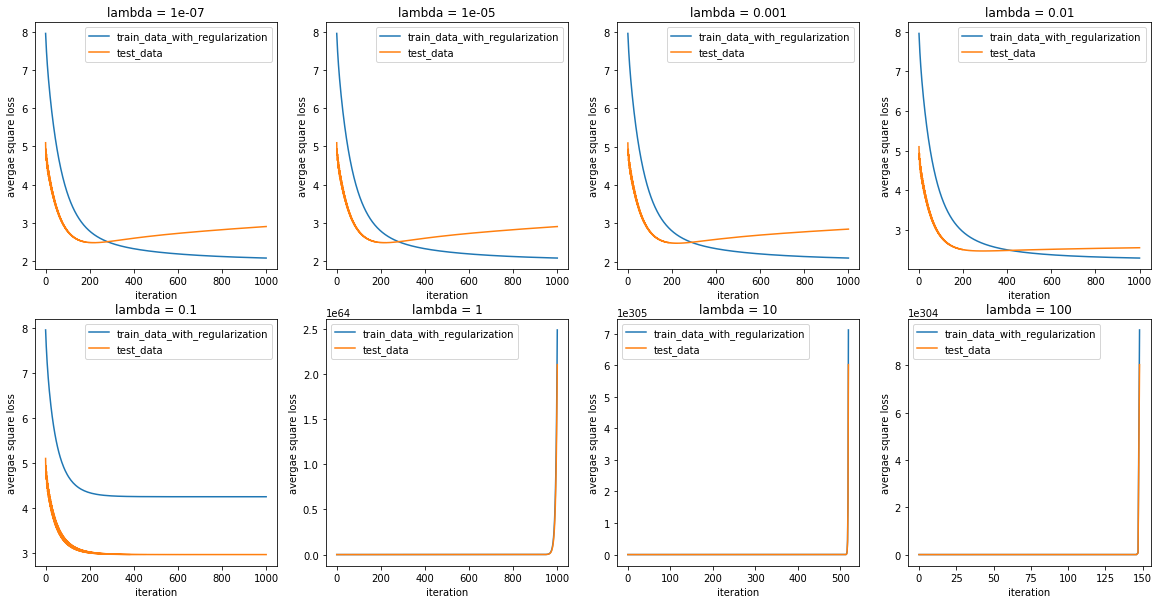

In [25]:
fig = plt.figure(figsize=(20,10))
plot_i = 1
for lambda_ in lambda_lst:
    theta_hist, loss_hist = regularized_grad_descent(train_X, train_y, alpha=0.05, lambda_reg=lambda_, num_step=1000)
    loss_hist_test = [compute_square_loss(test_X, test_y, theta) for theta in theta_hist]
    plt.subplot(2, 4, plot_i)
    plot_i += 1
    plt.plot(list(range(len(loss_hist))), loss_hist, label='train_data_with_regularization')
    plt.plot(list(range(len(loss_hist_test))), loss_hist_test, label='test_data')
    plt.xlabel('iteration')
    plt.ylabel('avergae square loss')
    plt.title(f'lambda = {lambda_}')
    plt.legend()

- It is obvious that when lambda >= 1, the regularization is so strong that the model could not learn any more. 
- Next, we zoom in the best range where $\lambda$ is in (1e-07, 1e-02).

In [26]:
power = [-7, -5, -3, -2, -1]
lambda_lst = [10**i for i in power]
lambda_lst

[1e-07, 1e-05, 0.001, 0.01, 0.1]

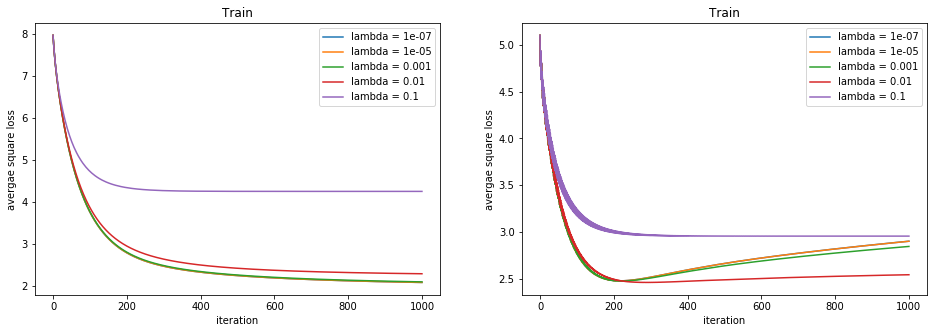

In [27]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
for lambda_ in lambda_lst:
    theta_hist, loss_hist = regularized_grad_descent(train_X, train_y, alpha=0.05, lambda_reg=lambda_, num_step=1000)
    loss_hist_test = [compute_square_loss(test_X, test_y, theta) for theta in theta_hist]
    ax1.plot(list(range(len(loss_hist))), loss_hist, label=f'lambda = {lambda_}')
    ax2.plot(list(range(len(loss_hist_test))), loss_hist_test, label=f'lambda = {lambda_}')
    ax1.set_xlabel('iteration')
    ax2.set_xlabel('iteration')
    ax1.set_title('Train')
    ax2.set_title('Train')
    ax1.set_ylabel('avergae square loss')
    ax2.set_ylabel('avergae square loss')
    ax1.legend()
    ax2.legend()
plt.show()


In terms of overfitting,

- Models with different lambda all converge on the train set, while some of them show diverge on the test set. 
- In other words, after fixed times of iterations, some of the models tend to overfit.
- To analyze, this trend of overfitting highly relates to the value of lambda. The larger the lambda is, the stronger the regularization is, meaning overfitting becomes less possible as the red curve showns. However, there is also a upper bound for lambda. When the lambda is too large(0.1), the strong regularizer would unable the model to learn, leading to underfitting as the purple curve showns.

### Answer to Question_15

- From Answer to Question_14, we can see that lambda = 0.01 works nicely. 
- When lambda = 0.1, the model underfits; when lambda = 0.001, the model overfits. 
- Hence, in this answer, we want to zoom in the range round lambda = 0.01. 

In [28]:
lambda_lst = np.linspace(10**-3, 10**-1)
lambda_lst

array([0.001     , 0.00302041, 0.00504082, 0.00706122, 0.00908163,
       0.01110204, 0.01312245, 0.01514286, 0.01716327, 0.01918367,
       0.02120408, 0.02322449, 0.0252449 , 0.02726531, 0.02928571,
       0.03130612, 0.03332653, 0.03534694, 0.03736735, 0.03938776,
       0.04140816, 0.04342857, 0.04544898, 0.04746939, 0.0494898 ,
       0.0515102 , 0.05353061, 0.05555102, 0.05757143, 0.05959184,
       0.06161224, 0.06363265, 0.06565306, 0.06767347, 0.06969388,
       0.07171429, 0.07373469, 0.0757551 , 0.07777551, 0.07979592,
       0.08181633, 0.08383673, 0.08585714, 0.08787755, 0.08989796,
       0.09191837, 0.09393878, 0.09595918, 0.09797959, 0.1       ])

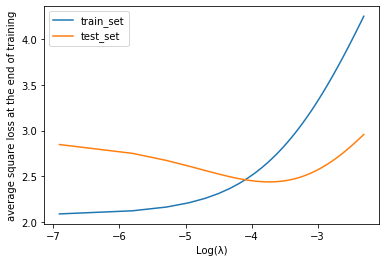

In [29]:
loss_hist_train = []
loss_hist_test = []
for lambda_ in lambda_lst:
    theta_hist, loss_hist = regularized_grad_descent(train_X, train_y, alpha=0.05, lambda_reg=lambda_, num_step=1000)
    loss_hist_train.append(loss_hist[-1])
    loss_hist_test.append(compute_square_loss(test_X, test_y, theta_hist[-1]))
plt.plot(np.log(lambda_lst), loss_hist_train, label='train_set');
plt.plot(np.log(lambda_lst), loss_hist_test, label='test_set');
plt.xlabel('Log(λ)');
plt.ylabel('average square loss at the end of training');
plt.legend();

In [30]:
print(f'The minimum test loss is {loss_hist_test[np.argmin(loss_hist_test)]}.')
print(f'The optimal chosen lambda is {lambda_lst[np.argmin(loss_hist_test)]}.')

The minimum test loss is 2.440312621658701.
The optimal chosen lambda is 0.02322448979591837.


### Answer to Question_16

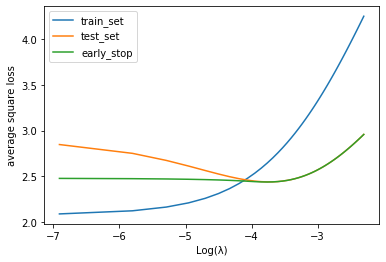

In [31]:
loss_hist_train = []
loss_hist_test = []
loss_hist_test_min = []

for lambda_ in lambda_lst:
    theta_hist, loss_hist = regularized_grad_descent(train_X, train_y, alpha=0.05, lambda_reg=lambda_, num_step=1000)
    loss_hist_test_lst = [compute_square_loss(test_X, test_y, theta) for theta in theta_hist]
    
    loss_hist_train.append(loss_hist[-1])
    loss_hist_test.append(compute_square_loss(test_X, test_y, theta_hist[-1]))
    loss_hist_test_min.append(np.min(loss_hist_test_lst))


plt.plot(np.log(lambda_lst), loss_hist_train, label='train_set');
plt.plot(np.log(lambda_lst), loss_hist_test, label='test_set');
plt.plot(np.log(lambda_lst), loss_hist_test_min, label='early_stop');

plt.xlabel('Log(λ)');
plt.ylabel('average square loss');
plt.legend();

In [32]:
print(f'The minimum test loss is {loss_hist_test_min[np.argmin(loss_hist_test_min)]}.')
print(f'The optimal chosen lambda is {lambda_lst[np.argmin(loss_hist_test_min)]}.')

The minimum test loss is 2.439108529720412.
The optimal chosen lambda is 0.02322448979591837.


- We can see that the result is nearly the same as the previous answer.
- It proves that early_stop works alternatively as a regularizer.

### Answer to Question_17

- I would select lambda based on the first method (at the end of training) rather than the second method (early stop). 
- In practice, there are chances that the second method stucks when it meets the local minimum. The model would return the result, disgarding of the global minimum.

### Answer to Question_18 (Optional)

$$J(\theta)=\frac1m \Sigma_{i=1}^m(h_{\theta}(x_i)-y_i)^2+\lambda\theta^T\theta$$
$$=\frac1m \Sigma_{i=1}^m((h_{\theta}(x_i)-y_i)^2+\lambda\theta^T\theta)$$

$$f_i(\theta)=(h_{\theta}(x_i)-y_i)^2+\lambda\theta^T\theta$$

### Answer to Question_19 (Optional)

$$E[\bigtriangledown f_i(\theta)]=\Sigma_{j=1}^m P(i=j)\bigtriangledown f_i(\theta)=\frac1m \Sigma_{i=1}^m \bigtriangledown f_i(\theta)=\bigtriangledown J_\lambda(\theta)$$

### Answer to Question_20 (Optional)

$$f_i(\theta)=(\theta^Tx_i-y_i)^T(\theta^Tx_i-y_i)+\lambda\theta^T\theta$$

$$\bigtriangledown f_i(\theta)=2(\theta_i^Tx_i-y_i)x_i+2\lambda\theta_i$$

$$\theta^{new}=\theta-2\eta*[(\theta_i^Tx_i-y_i)x_i+\lambda\theta_i]$$

### Answer to Question_21 (Optional)

In [33]:
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    
    
    step = 1
    for i in range(num_epoch):
        shuffle = np.random.permutation(num_instances)
        for row in shuffle:
            if isinstance(alpha, str):
                if alpha == '0.1/sqrt(step)':
                    alpha = 0.1/np.sqrt(step)
                else:
                    alpha = 0.1/step
            else:
                alpha = alpha
                
            theta = theta - alpha * compute_regularized_square_loss_gradient(X[row,:], y[row], theta, lambda_reg) 
            theta_hist[i,j] = theta
            loss_hist[i,j] = compute_square_loss(X, y, theta) + lambda_reg * np.sum(theta ** 2)
            step += 1
            
    return theta_hist, loss_hist

### Answer to Question_22 (Optional)

### Answer to Question_23

In [34]:
ls 

1003-HW2-WenxinZhang.ipynb           mnist_classification_source_code.py
hw2.pdf                              ridge_regression_dataset.csv
hw2.tex                              skeleton_code.py
math_commands.tex


In [35]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
import sklearn
sklearn.__version__

'0.24.1'

In [37]:
def pre_process_mnist_01():
    """
    Load the mnist datasets, selects the classes 0 and 1 
    and normalize the data.
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, 
                                    return_X_y=True, as_frame=False)
    indicator_01 = (y_mnist == '0') + (y_mnist == '1')
    X_mnist_01 = X_mnist[indicator_01]
    y_mnist_01 = y_mnist[indicator_01]
    X_train, X_test, y_train, y_test = train_test_split(X_mnist_01, y_mnist_01,
                                                        test_size=0.33,
                                                        shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)

    y_test = 2 * np.array([int(y) for y in y_test]) - 1
    y_train = 2 * np.array([int(y) for y in y_train]) - 1
    return X_train, X_test, y_train, y_test

In [38]:
X_train, X_test, y_train, y_test = pre_process_mnist_01()

In [39]:
# X_train.shape # (9902, 784)
# X_test.shape # (4878, 784)
# y_train # -1, 1
# y_test # -1, 1

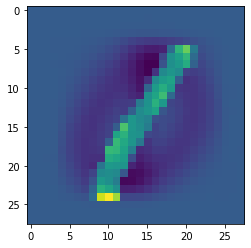

In [40]:
sample_1 = X_train[1, :] # (9902, 784)
sample_1.shape
plt.imshow(sample_1.reshape(28, 28)) # reshape the sample

### Proof

$$l_i(logistic) = log(1+e^{-m_i}); \ \ where \ m_i = y_i h_{\theta,b}(x_i)$$

$$Thus, \ l_i(logistic) = log(1+e^{-y_i h_{\theta,b}(x_i)})$$

$$When \ y_i = -1, l_i(logistic) = log(1+e^{h_{\theta,b}(x_i)}) = \frac{1}{2}(1-y_i)log(1+e^{h_{\theta,b}(x_i)}), \ where \ \frac{1}{2}(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}) = 0$$

$$When \ y_i = 1, l_i(logistic) = log(1+e^{-h_{\theta,b}(x_i)}) = \frac{1}{2}(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}), \ where \ \frac{1}{2}(1-y_i)log(1+e^{h_{\theta,b}(x_i)}) = 0$$

$$Hence, \ we \ can \ conclude \ that: $$
$$l_i(logistic) = \frac{1}{2}[(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}) + (1-y_i)log(1+e^{h_{\theta,b}(x_i)})]$$

$$Considering \ there \ are \ m \ training \ data \ points, \ we \ can \ write \ objective \ function \ as:$$

$$L{(\theta)} = \frac{1}{2m} \sum_{i=1}^m [(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}) + (1-y_i)log(1+e^{h_{\theta,b}(x_i)})]$$

### Answer to Question_24

$$L{(\theta)} = \frac{1}{2m} \sum_{i=1}^m [(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}) + (1-y_i)log(1+e^{h_{\theta,b}(x_i)})] + \alpha \|{\theta}\|$$


### Answer to Question_25

In [41]:
def classification_error(clf, X, y):
    ## TODO
    
    y_pre = clf.predict(X)
    loss = [int(y_pre[i] != y[i]) for i in range(len(y))]

    return np.sum(loss)/len(loss)


def check_func_classification_error(clf, X, y):
    print('')
    print('*'*100)
    print('Check whether the function classification_error works well:') 
    
    train_right = 1 - clf.score(X, y)
    train_func = classification_error(clf, X, y)
    
    if round(train_func,5) == round(train_right,5):
        print('Congratulations, the function classification_error is absolutely right!')
    else:
        print('Sorry, the function classification_error is wrong, please double check it!')
        
    return 
        
clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=0.01, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=1)
clf.fit(X_train, y_train)


test = classification_error(clf, X_test, y_test)
train = classification_error(clf, X_train, y_train)
print('train: ', train, end='\t')
print('test: ', test)

check_func_classification_error(clf, X_train, y_train)

-- Epoch 1
Norm: 0.68, NNZs: 277, Bias: 0.010384, T: 9902, Avg. loss: 0.041480
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.77, NNZs: 258, Bias: 0.010147, T: 19804, Avg. loss: 0.031832
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.83, NNZs: 240, Bias: 0.010186, T: 29706, Avg. loss: 0.030132
Total training time: 0.13 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 230, Bias: 0.010375, T: 39608, Avg. loss: 0.029332
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 0.92, NNZs: 224, Bias: 0.010624, T: 49510, Avg. loss: 0.028740
Total training time: 0.21 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 218, Bias: 0.010927, T: 59412, Avg. loss: 0.028363
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 0.98, NNZs: 211, Bias: 0.011245, T: 69314, Avg. loss: 0.027990
Total training time: 0.30 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 209, Bias: 0.011597, T: 79216, Avg. loss: 0.027769
Total training time: 0.35 seconds.
Convergence after 8 epochs took 0.35 seconds
train:  0.00222177337911533	test:  0

### Answer to Question_26

In [42]:
def sub_sample(N_train, X_train, y_train):
    """
    Subsample the training data to keep only N first elements
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    assert N_train <= X_train.shape[0]
    return X_train[:N_train, :], y_train[:N_train]

In [43]:
X_train_sub, y_train_sub = sub_sample(N_train=100, X_train=X_train, y_train=y_train)

# X_train_sub.shape # (100, 784)
# y_train_sub.shape # (100,)

$$L{(\theta)} = \frac{1}{2m} \sum_{i=1}^m [(1+y_i)log(1+e^{-h_{\theta,b}(x_i)}) + (1-y_i)log(1+e^{h_{\theta,b}(x_i)})] + \alpha \|{\theta}\|$$



In [44]:
def test_classification_error(alpha_lst_, X_train_, y_train_, X_test_, y_test_, plot_):
    # alpha:
    # The higher the value, the stronger the regularization.
    error_mean = []
    error_std = []
    theta_lst = []
    for alpha_ in alpha_lst_:
        clf = SGDClassifier(loss='log', max_iter=1000, 
                            tol=1e-3,
                            penalty='l1', alpha=alpha_, 
                            learning_rate='invscaling', 
                            power_t=0.5,                
                            eta0=0.01,
                            verbose=0)
        test_error = []
        for _ in range(10):
            clf.fit(X_train_, y_train_)
            test_error.append(classification_error(clf, X_test_, y_test_))
            if _ == 0:
                theta_lst.append(clf.coef_)
                
        error_mean.append(np.mean(test_error))
        error_std.append(np.std(test_error))
        
    if plot_:
        plt.errorbar(np.log(alpha_lst), error_mean, error_std)
        plt.xlabel('Log(alpha)')
        plt.ylabel('Test Classifier Error')
        plt.title('Error Bar of Test Classifier Error')
        plt.show();
                 
    return theta_lst, error_mean

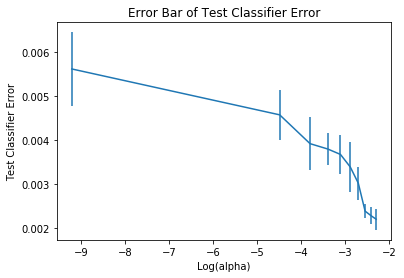

In [45]:
alpha_lst = np.linspace(start=10**(-4), stop=10**(-1), num=10) 
test_classification_error(alpha_lst, X_train_sub, y_train_sub, X_test, y_test, True);

### Answer to Question_27

Stochastic gradient descent is actually Minibatch method with N = 1, meaning it uses only a single randomly chosen point to determine its step direction. Here, considering that we only take 100 training subset into account, by repeating the experiment 10 times, we reduce the randomness of the chosen point by changing N = 10 (10% of Batch).

### Answer to Question_28

In [46]:
theta_lst, error_mean = test_classification_error(alpha_lst, X_train_sub, y_train_sub, X_test, y_test, False)
error_mean

[0.005248052480524805,
 0.004592045920459204,
 0.004161541615416154,
 0.003751537515375154,
 0.003546535465354653,
 0.003095530955309553,
 0.0031980319803198037,
 0.0023985239852398524,
 0.002173021730217302,
 0.002132021320213202]

In [47]:
alpha_lst[error_mean.index(np.min(error_mean))]

0.1

### Answer to Question_29

In [48]:
theta_lst, error_mean = test_classification_error(alpha_lst, X_train_sub, y_train_sub, X_test, y_test, False)

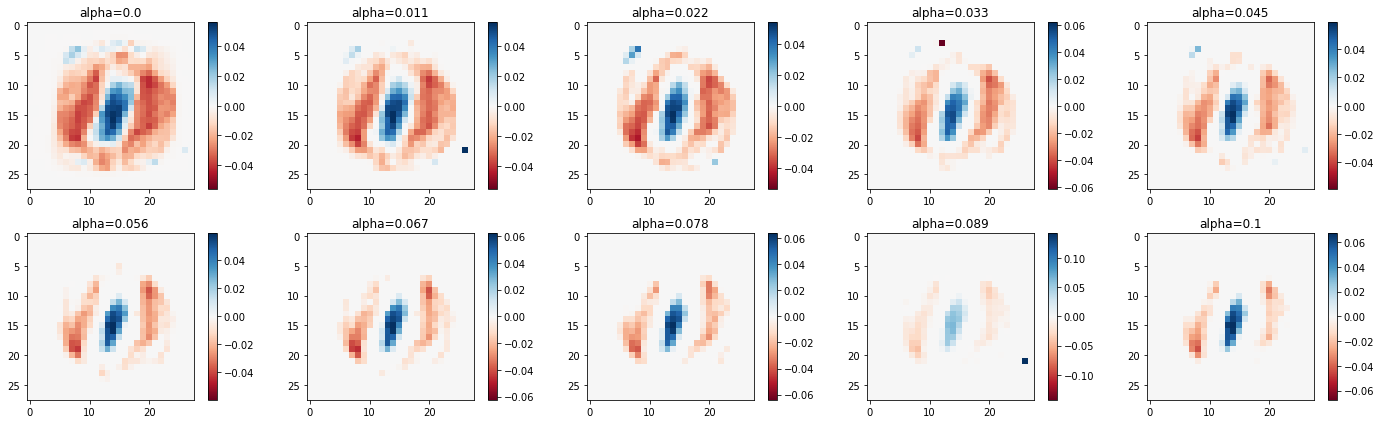

In [49]:
fig = plt.figure(figsize=(20,6))
for alpha, theta, i in zip(alpha_lst, theta_lst, list(range(10))):
    plt.subplot(2,5,i+1)
    scale = np.abs(theta).max()
    plt.imshow(theta.reshape(28, 28), cmap=plt.cm.RdBu, vmax=scale, vmin=-scale)
    plt.title(f'alpha={round(alpha,3)}')
    plt.colorbar()
    plt.tight_layout()
plt.show()

### Answer to Question_30

From above, we can see that:
- In each plot, the red part represents 0, while the blue part represents 1. 
- The red part and the blue part appears distinctively on each plot, showing that our classifier works well to find the latent patterns of 0 and 1.
- As the regularization part becomes larger, it is shown that color range of the plot becomes smaller. This pheonomenon reflects that our theta vector is getting sparser; and its norm is getting smaller.
- When alpha = 0.1(biggest value in our chosen range), only the most important features/ patterns that distinguish 0 and 1 are kept.